# Exploratory Data Analysis (EDA)
---
1) Importing Necessary Libraries
2) Loading Datasets
3) Describing Statistics
4) Detecting Outliers
5) Exploring Visualization
6) Hypothesis Testing
---
**1. Importing Necessary Libraries**  

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

**2. Loading Datasets**

In [14]:
df = pd.read_csv('client_data.csv')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


**3. Describing Statistics**

In [15]:
# Checking datatypes and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

Based on above data information we can observe the data types of each attribute and there are no null values in any column. This can also be checked using df.isnull().sum().

In [16]:
# Checking data statistics

df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


**4. Detecting Outliers**

In [20]:
# Defining function to check outliers 

def detect_outliers(df):
    numeric_attributes = df.select_dtypes(include=['float64', 'int64']).columns
    outliers = {}

    for col in numeric_attributes:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        outliers_attribute = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers_attribute.empty:
            outliers[col] = len(outliers_attribute)
    
    if outliers:
        print("Attributes with outliers and their counts: ")
        for col, count in outliers.items():
            print(f"{col}: {count} outliers")

    else:
        print("No Outliers Detected!") 

In [21]:
detect_outliers(df)

Attributes with outliers and their counts: 
cons_12m: 2084 outliers
cons_gas_12m: 2612 outliers
cons_last_month: 2051 outliers
forecast_cons_12m: 1054 outliers
forecast_cons_year: 1298 outliers
forecast_discount_energy: 512 outliers
forecast_meter_rent_12m: 152 outliers
forecast_price_energy_off_peak: 371 outliers
forecast_price_pow_off_peak: 345 outliers
imp_cons: 1215 outliers
margin_gross_pow_ele: 660 outliers
margin_net_pow_ele: 660 outliers
nb_prod_act: 3175 outliers
net_margin: 1022 outliers
num_years_antig: 389 outliers
pow_max: 1535 outliers
churn: 1419 outliers


It can be observed from above that the attributes of our dataset consist of several outliers. This could be visulaized as well in the visualization section. Thus these outliers need to be treated in later stage while drawing deeper insights and developing predictive model. 

**5. Exploring Visualization**

In [51]:
# Defining functions for visualization

def plot_churn_distribution(df):
    churn_counts = df['churn'].value_counts()
    total = churn_counts.sum()

    plt.figure(figsize=(6,4))
    sns.barplot(x = churn_counts.index, y = churn_counts.values, palette = 'viridis')
    plt.title('Number of Companies Churned vs Not Churned')
    plt.xlabel('Churn')
    plt.ylabel('Count of Companies')
    plt.xticks([0,1], ['No Churn', 'Churn'])

    for i, val in enumerate(churn_counts.values):
        plt.text(i, val + 200, f'{(val / total * 100): .2f}%', ha = 'center')
    
    plt.show()

C:\Users\bikas\AppData\Local\Temp\ipykernel_32860\1738270310.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = churn_counts.index, y = churn_counts.values, palette = 'viridis')


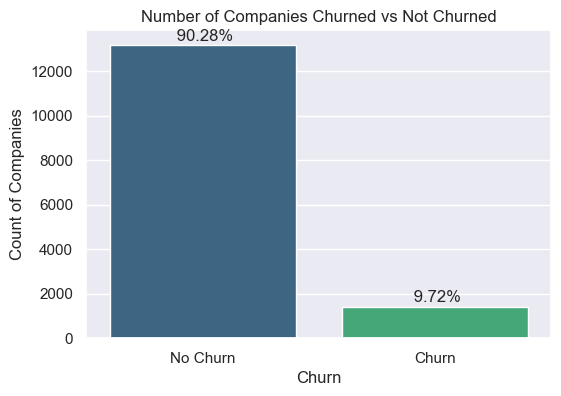

In [52]:
plot_churn_distribution(df)

We can refer from above that the churn rate is approximately 10%. This is actually a very good churn rate.

In [35]:
def plot_churn_factors(df):
    plt.figure(figsize=(8,6))
    sns.countplot(x = 'channel_sales', hue = 'churn', data = df, palette = 'coolwarm')
    plt.title('Churn vs Sales Channel')
    plt.xticks(rotation = 90)
    total = len(df)

    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height + 50, f'{(height/total*100): .2f}%', ha = "center")

    plt.show()

    plt.figure(figsize=(8,6))
    sns.countplot(x = 'nb_prod_act', hue = 'churn', data = df, palette = 'coolwarm')
    plt.title('Churn Vs Number of Products')
    plt.show()

    plt.figure(figsize=(8,6))
    sns.countplot(x = 'num_years_antig', hue = 'churn', data = df, palette = 'coolwarm')
    plt.title('Churn Vs Number of Years with Company')
    plt.show()

    plt.figure(figsize=(8,6))
    sns.countplot(x = 'origin_up', hue = 'churn', data = df, palette = 'coolwarm')
    plt.title('Churn Vs Origin/Contract Offer')
    plt.show()



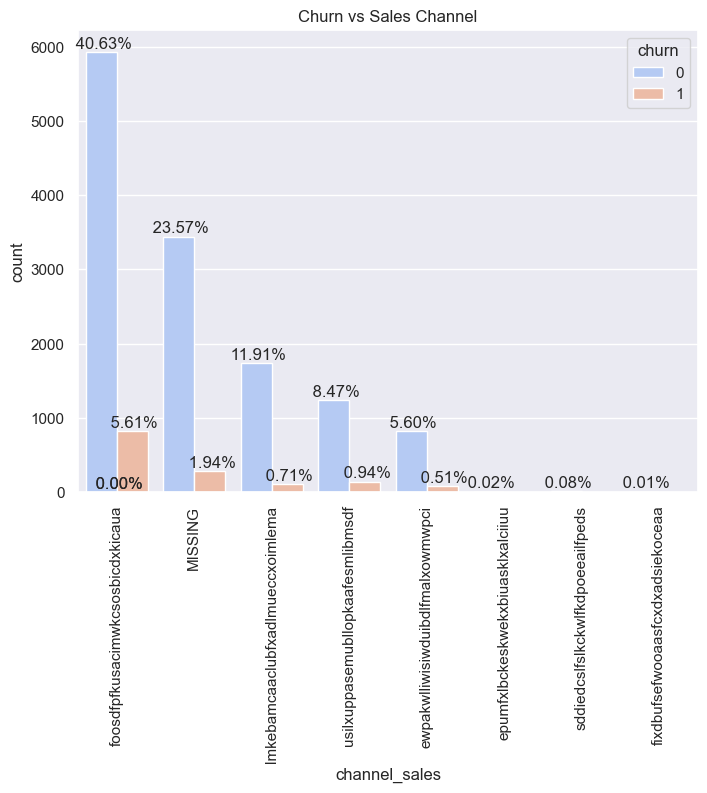

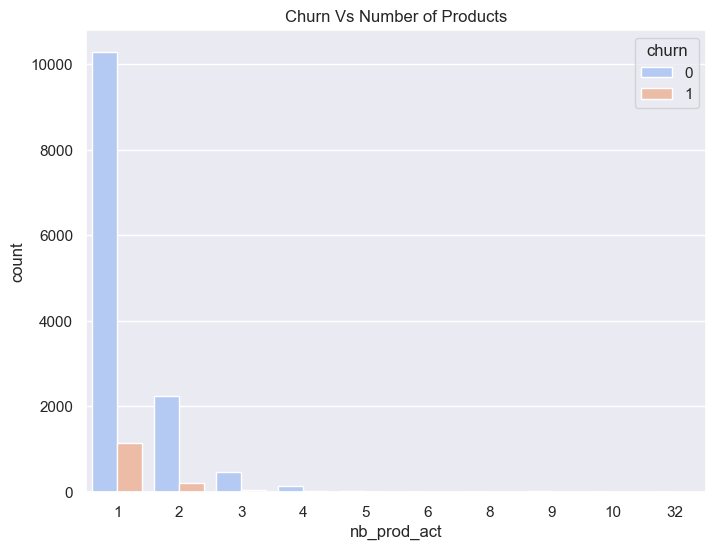

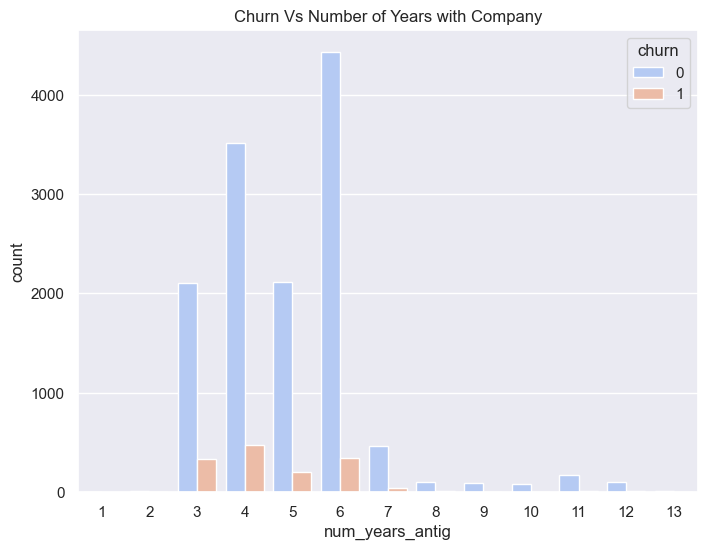

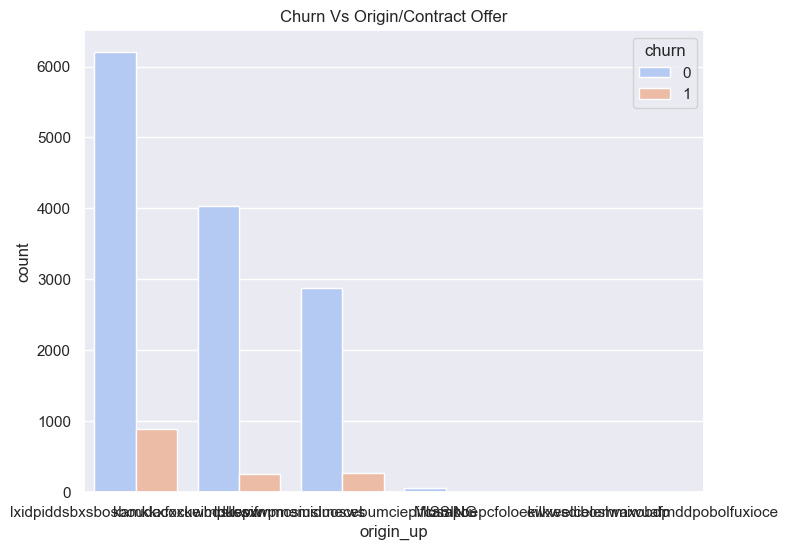

In [36]:
plot_churn_factors(df)

In [25]:
def plot_distributions(df):

    # Distribution of Consumption over 12 months

    plt.figure(figsize=(8,6))
    sns.histplot(df['cons_12m'], kde = True, color='blue', bins = 30)
    plt.title('Distribution of Consumption over 12 months')
    plt.show()

    # Distribution of Subscribed Power

    plt.figure(figsize=(8,6))
    sns.histplot(df['pow_max'], kde = True, color = 'green', bins = 30)
    plt.title('Distribution of Subscribed Power')
    plt.show()

    # Distribution of Forecast Consumption over 12 months

    plt.figure(figsize=(8,6))
    sns.histplot(df['forecast_cons_12m'], kde = True, color = 'red', bins = 30)
    plt.title('Distribution of Forecast Consumption over 12 months')
    plt.show()

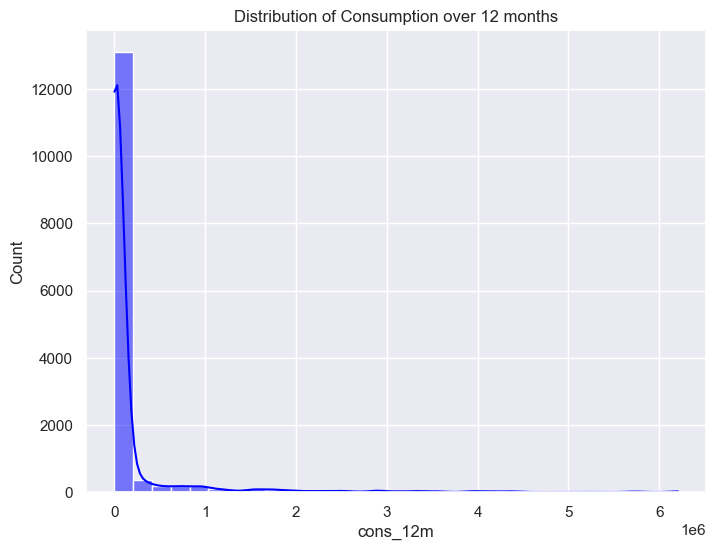

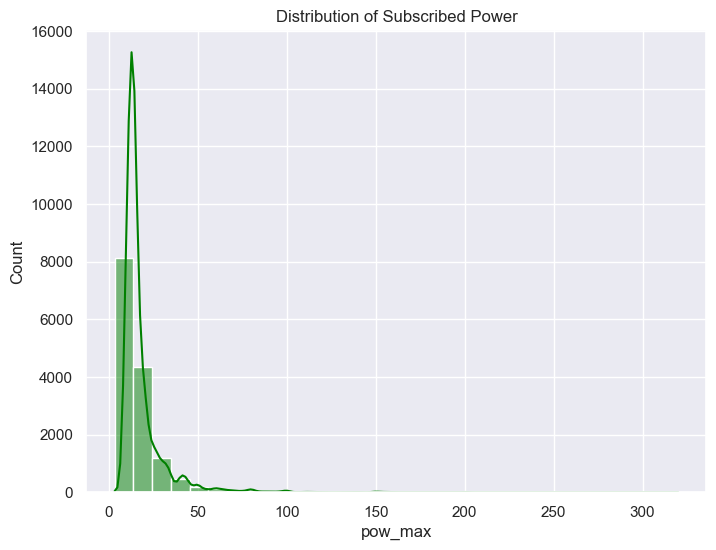

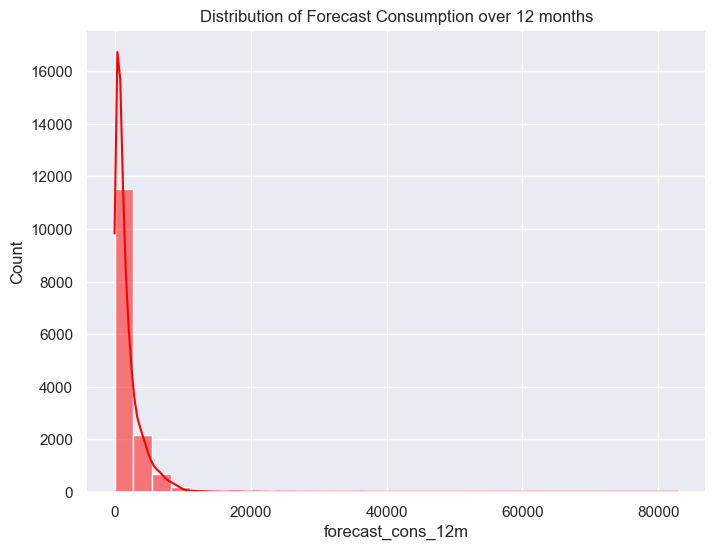

In [28]:
plot_distributions(df)

The above distribution is right skewed showing the presence of positive outliers which were obtained while detecting the outliers in previous section. The outliers could further be better visualizaed by using boxplot.  

**6. Hypothesis Testing**

In [46]:
# Function for Hypothesis testing

def hypothesis_testing(df):
    
    sales_channel_churn = pd.crosstab(df['channel_sales'], df['churn'])
    chi2, p, dof, expected = chi2_contingency(sales_channel_churn)

    origin_churn = pd.crosstab(df['origin_up'], df['churn'])
    chi2_origin, p_origin, dof_origin, expected_origin = chi2_contingency(origin_churn)

    # Churn vs Sales Channel

    plt.figure(figsize=(8,6))
    sns.heatmap(sales_channel_churn, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"Sales Channel vs Churn (p-value: {p:.4f})")
    plt.show()

    # Churn vs Origin/Contract Offer

    plt.figure(figsize=(8,6))
    sns.heatmap(origin_churn, annot = True, fmt = 'd', cmap = 'YlGnBu')
    plt.title(f"Origin/Contract Offer vs Churn (p-value: {p_origin:.4f})")
    plt.show()

    return p, p_origin

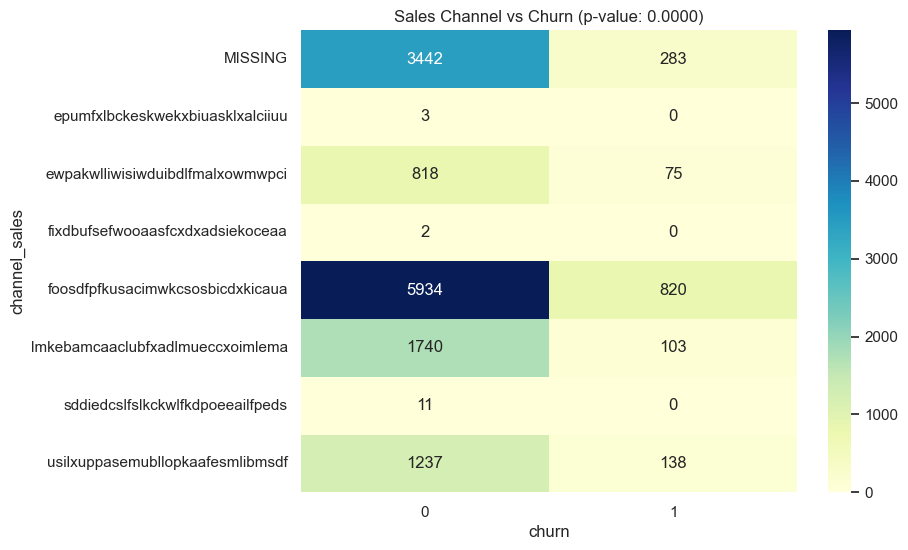

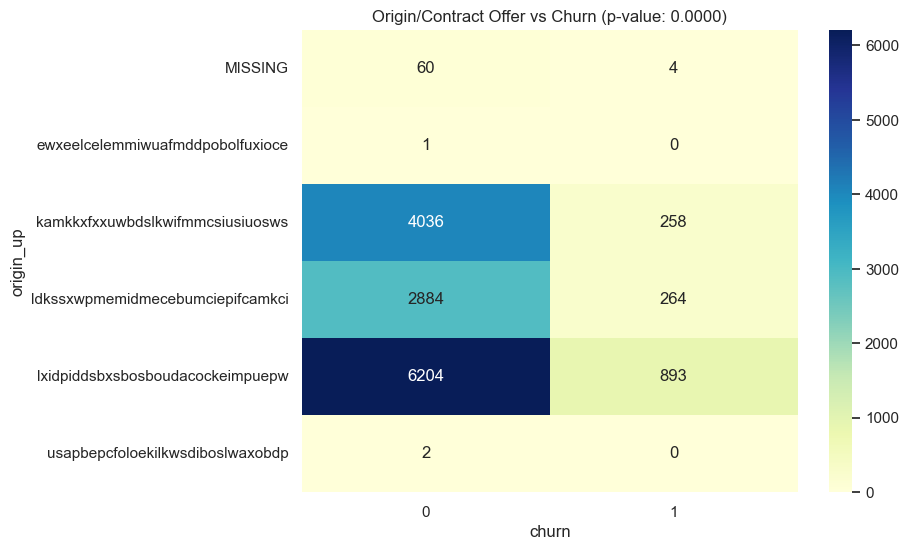

In [47]:
p_values = hypothesis_testing(df)

In [48]:
print(f"P-value for Churn vs Sales Channel: {p_values[0]}")
print(f"P-value for Churn vs Origin/Contract Offer: {p_values[1]}")

P-value for Churn vs Sales Channel: 1.7810651262162043e-19
P-value for Churn vs Origin/Contract Offer: 9.298626414308622e-29


The hypothesis testing results for churn vs. different factors are as follows:

1) Churn vs Sales Channel: The chi-square test yielded a p-value of 1.78e-19, indicating a statistically significant relationship between the sales channel and churn.

2) Churn vs Origin/Contract Offer: The p-value from the chi-square test was 9.30e-29, also suggesting a significant relationship between the origin or contract offer and churn.

These findings imply that the sales channel and the origin/contract offer significantly impact churn behavior.